### mouse hypothalamus MERFISH data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('data/merfish/v20181103/All/merfish_all_cells.csv')
df.head(5)

,Cell_ID,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID,Ace2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
0,6749ccb4-2ed1-4029-968f-820a287f43c8,1,Female,Naive,0.26,-3211.562145,2608.541476,Astrocyte,NaN,0.0,...,0.133016,0.000000,0.865263,0.002977,0.054826,0.008934,0.0,0.0,0.0,0.000000
1,6cac74bd-4ea7-4701-8701-42563cc65eb8,1,Female,Naive,0.26,-3207.923151,2621.795437,Inhibitory,I-5,0.0,...,0.000000,0.000000,0.277939,0.868702,0.580957,0.010079,0.0,0.0,0.0,0.000000
2,9f29bd57-16a5-4b26-b9f5-37598809da9e,1,Female,Naive,0.26,-3209.578004,2633.153494,Inhibitory,I-6,0.0,...,0.213939,0.000000,0.377907,0.049332,0.084898,0.008951,0.0,0.0,0.0,0.000000
3,d7eb4e0b-276e-47e3-a55c-0b033180a2fe,1,Female,Naive,0.26,-3203.853515,2756.045983,Inhibitory,I-5,0.0,...,0.050882,0.089038,0.000000,0.000000,0.001530,0.031364,0.0,0.0,0.0,0.001138
4,54434f3a-eba9-4aec-af35-c9d317ffa1d5,1,Female,Naive,0.26,-3202.682705,2608.803635,Inhibitory,I-9,0.0,...,1.250661,0.159618,0.211159,0.000000,0.087730,0.000000,0.0,0.0,0.0,0.029419


In [33]:
df.shape

(1027848, 170)

#### uesd the data from all 11 naive animals

In [4]:
set(df['Behavior'])

{'Aggression to adult',
 'Aggression to pup',
 'Mating',
 'Naive',
 'Parenting',
 'Virgin Parenting'}

In [3]:
df = df[df['Behavior'].str.contains('Naive')]
df.shape

(485657, 170)

#### remove all cells marked 'ambiguous' from the subsequent analysis

In [17]:
set(df['Cell_class'])

{'Ambiguous',
 'Astrocyte',
 'Endothelial 1',
 'Endothelial 2',
 'Endothelial 3',
 'Ependymal',
 'Excitatory',
 'Inhibitory',
 'Microglia',
 'OD Immature 1',
 'OD Immature 2',
 'OD Mature 1',
 'OD Mature 2',
 'OD Mature 3',
 'OD Mature 4',
 'Pericytes'}

In [4]:
df = df.drop(df[df['Cell_class'].str.contains('Ambiguous')].index)
df.shape

(417026, 170)

### Bregma = 0.26

In [14]:
set(df['Bregma'])

{-0.29, -0.24, -0.19, -0.14, -0.09, -0.04, 0.01, 0.06, 0.11, 0.16, 0.21, 0.26}

In [5]:
df_B26 = df[df['Bregma'] == 0.26]
df_B26.shape

(27330, 170)

In [104]:
df_B26['Animal_ID'].value_counts()

Animal_ID
7    4955
1    4832
5    4654
3    4586
2    4447
6    3856
Name: count, dtype: int64

In [ ]:
for i in set(df_B26['Animal_ID']):
    df_i = df_B26[df_B26['Animal_ID'] == i]
    m_X = df_i['Centroid_X'].median()
    m_Y = df_i['Centroid_Y'].median()
    df_i['Centroid_X'] = df_i['Centroid_X'] - m_X
    df_i['Centroid_Y'] = df_i['Centroid_Y'] - m_Y
    # spatial information
    df_si = df_i[["Cell_ID","Centroid_X","Centroid_Y"]]
    si_file = f'data/merfish/v20181103/Bregma_26/AnimalID_{i}_SI.csv'
    df_si.to_csv(si_file, index=False)
    # gene-cell matrix
    # the gene Fos was removed from the dataset because it contained not a number('NaN') entries
    df_gc = df_i[["Cell_ID","Ace2","Adora2a","Aldh1l1","Amigo2","Ano3","Aqp4","Ar","Arhgap36","Avpr1a","Avpr2","Baiap2","Bdnf","Bmp7","Brs3","Calcr","Cbln1","Cbln2","Cckar","Cckbr","Ccnd2","Cd24a","Cdkn1a","Cenpe","Chat","Coch","Col25a1","Cplx3","Cpne5","Creb3l1","Crhbp","Crhr1","Crhr2","Cspg5","Cxcl14","Cyp19a1","Cyp26a1","Cyr61","Dgkk","Ebf3","Egr2","Ermn","Esr1","Etv1","Fbxw13","Fezf1","Fn1","Fst","Gabra1","Gabrg1","Gad1","Galr1","Galr2","Gbx2","Gda","Gem","Gjc3","Glra3","Gpr165","Greb1","Grpr","Htr2c","Igf1r","Igf2r","Irs4","Isl1","Kiss1r","Klf4","Krt90","Lepr","Lmod1","Lpar1","Man1a","Mc4r","Mki67","Mlc1","Myh11","Ndnf","Ndrg1","Necab1","Nos1","Npas1","Npy1r","Npy2r","Ntng1","Ntsr1","Nup62cl","Omp","Onecut2","Opalin","Oprd1","Oprk1","Oprl1","Oxtr","Pak3","Pcdh11x","Pdgfra","Pgr","Plin3","Pnoc","Pou3f2","Prlr","Ramp3","Rgs2","Rgs5","Rnd3","Rxfp1","Scgn","Selplg","Sema3c","Sema4d","Serpinb1b","Serpine1","Sgk1","Slc15a3","Slc17a6","Slc17a7","Slc17a8","Slc18a2","Slco1a4","Sox4","Sox6","Sox8","Sp9","Synpr","Syt2","Syt4","Sytl4","Tacr1","Tacr3","Tiparp","Tmem108","Traf4","Trhr","Ttn","Ttyh2","Adcyap1","Cartpt","Cck","Crh","Gal","Gnrh1","Mbp","Nnat","Nts","Oxt","Penk","Scg2","Sln","Sst","Tac1","Tac2","Th","Trh","Ucn3","Vgf"]]
    df_gc = df_gc.T
    gc_file = f'data/merfish/v20181103/Bregma_26/AnimalID_{i}_GC.csv'
    df_gc.to_csv(gc_file)

In [90]:
df_B26 = df_B26[df_B26['Animal_ID'] == 7]

In [91]:
# spatial information
m_X = df_B26['Centroid_X'].median()
m_Y = df_B26['Centroid_Y'].median()
df_B26['Centroid_X'] = df_B26['Centroid_X'] - m_X
df_B26['Centroid_Y'] = df_B26['Centroid_Y'] - m_Y

In [92]:
df_B26['Cell_class'] = df_B26['Cell_class'].astype('category')
df_B26['Cell_class'] = df_B26['Cell_class'].cat.codes

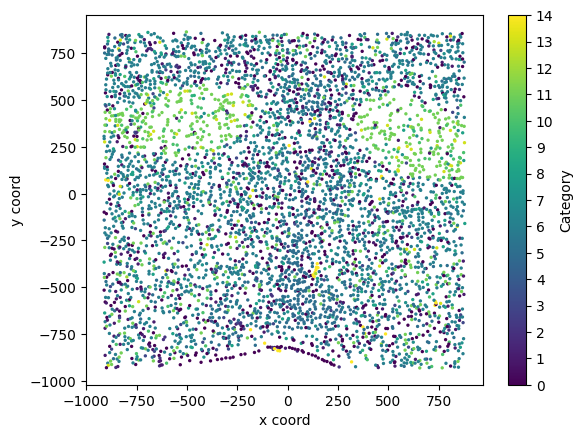

In [93]:
scatter = plt.scatter(df_B26['Centroid_X'], df_B26['Centroid_Y'], c=df_B26['Cell_class'], cmap='viridis',s=2)
plt.xlabel('x coord')
plt.ylabel('y coord')

plt.colorbar(scatter, ticks=range(len(df_B26['Cell_class'].unique())), label='Category')
plt.show()

In [ ]:
df_26 = []

for i in set(df_B26['Animal_ID']):
    df_i = df_B26[df_B26['Animal_ID'] == i]
    m_X = df_i['Centroid_X'].median()
    m_Y = df_i['Centroid_Y'].median()
    df_i['Centroid_X'] = df_i['Centroid_X'] - m_X
    df_i['Centroid_Y'] = df_i['Centroid_Y'] - m_Y
    df_26.append(df_i)

In [7]:
df_26 = pd.concat(df_26, ignore_index=True)

In [8]:
df_26.head(5)

,Cell_ID,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID,Ace2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
0,6749ccb4-2ed1-4029-968f-820a287f43c8,1,Female,Naive,0.26,-894.266583,-951.056563,Astrocyte,NaN,0.0,...,0.133016,0.000000,0.865263,0.002977,0.054826,0.008934,0.0,0.0,0.0,0.000000
1,6cac74bd-4ea7-4701-8701-42563cc65eb8,1,Female,Naive,0.26,-890.627589,-937.802602,Inhibitory,I-5,0.0,...,0.000000,0.000000,0.277939,0.868702,0.580957,0.010079,0.0,0.0,0.0,0.000000
2,9f29bd57-16a5-4b26-b9f5-37598809da9e,1,Female,Naive,0.26,-892.282442,-926.444545,Inhibitory,I-6,0.0,...,0.213939,0.000000,0.377907,0.049332,0.084898,0.008951,0.0,0.0,0.0,0.000000
3,d7eb4e0b-276e-47e3-a55c-0b033180a2fe,1,Female,Naive,0.26,-886.557953,-803.552056,Inhibitory,I-5,0.0,...,0.050882,0.089038,0.000000,0.000000,0.001530,0.031364,0.0,0.0,0.0,0.001138
4,54434f3a-eba9-4aec-af35-c9d317ffa1d5,1,Female,Naive,0.26,-885.387144,-950.794404,Inhibitory,I-9,0.0,...,1.250661,0.159618,0.211159,0.000000,0.087730,0.000000,0.0,0.0,0.0,0.029419


In [9]:
# spatial information
df_si = df_26[["Cell_ID","Centroid_X","Centroid_Y"]]
si_file = f'data/merfish/v20181103/Bregma_26/all_SI.csv'
df_si.to_csv(si_file, index=False)
# gene-cell matrix
# the gene Fos was removed from the dataset because it contained not a number('NaN') entries
df_gc = df_26[["Cell_ID","Ace2","Adora2a","Aldh1l1","Amigo2","Ano3","Aqp4","Ar","Arhgap36","Avpr1a","Avpr2","Baiap2","Bdnf","Bmp7","Brs3","Calcr","Cbln1","Cbln2","Cckar","Cckbr","Ccnd2","Cd24a","Cdkn1a","Cenpe","Chat","Coch","Col25a1","Cplx3","Cpne5","Creb3l1","Crhbp","Crhr1","Crhr2","Cspg5","Cxcl14","Cyp19a1","Cyp26a1","Cyr61","Dgkk","Ebf3","Egr2","Ermn","Esr1","Etv1","Fbxw13","Fezf1","Fn1","Fst","Gabra1","Gabrg1","Gad1","Galr1","Galr2","Gbx2","Gda","Gem","Gjc3","Glra3","Gpr165","Greb1","Grpr","Htr2c","Igf1r","Igf2r","Irs4","Isl1","Kiss1r","Klf4","Krt90","Lepr","Lmod1","Lpar1","Man1a","Mc4r","Mki67","Mlc1","Myh11","Ndnf","Ndrg1","Necab1","Nos1","Npas1","Npy1r","Npy2r","Ntng1","Ntsr1","Nup62cl","Omp","Onecut2","Opalin","Oprd1","Oprk1","Oprl1","Oxtr","Pak3","Pcdh11x","Pdgfra","Pgr","Plin3","Pnoc","Pou3f2","Prlr","Ramp3","Rgs2","Rgs5","Rnd3","Rxfp1","Scgn","Selplg","Sema3c","Sema4d","Serpinb1b","Serpine1","Sgk1","Slc15a3","Slc17a6","Slc17a7","Slc17a8","Slc18a2","Slco1a4","Sox4","Sox6","Sox8","Sp9","Synpr","Syt2","Syt4","Sytl4","Tacr1","Tacr3","Tiparp","Tmem108","Traf4","Trhr","Ttn","Ttyh2","Adcyap1","Cartpt","Cck","Crh","Gal","Gnrh1","Mbp","Nnat","Nts","Oxt","Penk","Scg2","Sln","Sst","Tac1","Tac2","Th","Trh","Ucn3","Vgf"]]
df_gc = df_gc.T
gc_file = f'data/merfish/v20181103/Bregma_26/all_GC.csv'
df_gc.to_csv(gc_file)

### Bregma = 0.16 and 

In [10]:
df_B16 = df[df['Bregma'] == 0.16]
df_B16.shape

(28898, 170)

In [11]:
df_B16['Animal_ID'].value_counts()

Animal_ID
1    5169
7    4988
5    4983
3    4858
2    4561
6    4339
Name: count, dtype: int64

In [ ]:
for i in set(df_B16['Animal_ID']):
    df_i = df_B16[df_B16['Animal_ID'] == i]
    m_X = df_i['Centroid_X'].median()
    m_Y = df_i['Centroid_Y'].median()
    df_i['Centroid_X'] = df_i['Centroid_X'] - m_X
    df_i['Centroid_Y'] = df_i['Centroid_Y'] - m_Y
    # spatial information
    df_si = df_i[["Cell_ID","Centroid_X","Centroid_Y"]]
    si_file = f'data/merfish/v20181103/Bregma_16/AnimalID_{i}_SI.csv'
    df_si.to_csv(si_file, index=False)
    # gene-cell matrix
    # the gene Fos was removed from the dataset because it contained not a number('NaN') entries
    df_gc = df_i[["Cell_ID","Ace2","Adora2a","Aldh1l1","Amigo2","Ano3","Aqp4","Ar","Arhgap36","Avpr1a","Avpr2","Baiap2","Bdnf","Bmp7","Brs3","Calcr","Cbln1","Cbln2","Cckar","Cckbr","Ccnd2","Cd24a","Cdkn1a","Cenpe","Chat","Coch","Col25a1","Cplx3","Cpne5","Creb3l1","Crhbp","Crhr1","Crhr2","Cspg5","Cxcl14","Cyp19a1","Cyp26a1","Cyr61","Dgkk","Ebf3","Egr2","Ermn","Esr1","Etv1","Fbxw13","Fezf1","Fn1","Fst","Gabra1","Gabrg1","Gad1","Galr1","Galr2","Gbx2","Gda","Gem","Gjc3","Glra3","Gpr165","Greb1","Grpr","Htr2c","Igf1r","Igf2r","Irs4","Isl1","Kiss1r","Klf4","Krt90","Lepr","Lmod1","Lpar1","Man1a","Mc4r","Mki67","Mlc1","Myh11","Ndnf","Ndrg1","Necab1","Nos1","Npas1","Npy1r","Npy2r","Ntng1","Ntsr1","Nup62cl","Omp","Onecut2","Opalin","Oprd1","Oprk1","Oprl1","Oxtr","Pak3","Pcdh11x","Pdgfra","Pgr","Plin3","Pnoc","Pou3f2","Prlr","Ramp3","Rgs2","Rgs5","Rnd3","Rxfp1","Scgn","Selplg","Sema3c","Sema4d","Serpinb1b","Serpine1","Sgk1","Slc15a3","Slc17a6","Slc17a7","Slc17a8","Slc18a2","Slco1a4","Sox4","Sox6","Sox8","Sp9","Synpr","Syt2","Syt4","Sytl4","Tacr1","Tacr3","Tiparp","Tmem108","Traf4","Trhr","Ttn","Ttyh2","Adcyap1","Cartpt","Cck","Crh","Gal","Gnrh1","Mbp","Nnat","Nts","Oxt","Penk","Scg2","Sln","Sst","Tac1","Tac2","Th","Trh","Ucn3","Vgf"]]
    df_gc = df_gc.T
    gc_file = f'data/merfish/v20181103/Bregma_16/AnimalID_{i}_GC.csv'
    df_gc.to_csv(gc_file)

In [95]:
df_B16 = df_B16[df_B16['Animal_ID'] == 1]

In [96]:
df_B16['Cell_class'] = df_B16['Cell_class'].astype('category')
df_B16['Cell_class'] = df_B16['Cell_class'].cat.codes

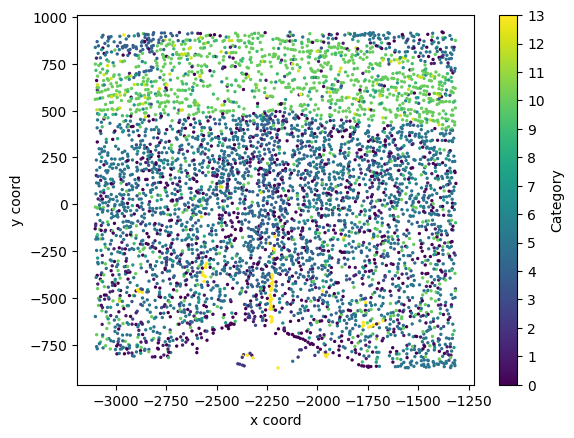

In [97]:
scatter = plt.scatter(df_B16['Centroid_X'], df_B16['Centroid_Y'], c=df_B16['Cell_class'], cmap='viridis',s=2)
plt.xlabel('x coord')
plt.ylabel('y coord')

plt.colorbar(scatter, ticks=range(len(df_B16['Cell_class'].unique())), label='Category')
plt.show()

In [ ]:
df_16 = []

for i in set(df_B16['Animal_ID']):
    df_i = df_B16[df_B16['Animal_ID'] == i]
    m_X = df_i['Centroid_X'].median()
    m_Y = df_i['Centroid_Y'].median()
    df_i['Centroid_X'] = df_i['Centroid_X'] - m_X
    df_i['Centroid_Y'] = df_i['Centroid_Y'] - m_Y
    df_16.append(df_i)

In [13]:
df_16 = pd.concat(df_16, ignore_index=True)

In [14]:
df_16.head(5)

,Cell_ID,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID,Ace2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
0,4ec0fe04-ca4d-4884-8bb5-352150a62df0,1,Female,Naive,0.16,-911.456038,-849.370934,Inhibitory,I-26,3.004331,...,0.000000,0.0,0.126458,0.46147,0.152312,0.009062,0.000000,0.0,0.000000,0.000000
1,13b8ca66-c045-4bce-9780-d5451d3157d2,1,Female,Naive,0.16,-911.234631,-785.789189,OD Mature 2,NaN,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.028180,0.000000,0.0,0.006529,0.000000
2,3d7452c0-14c5-4683-9d97-0afa490f718c,1,Female,Naive,0.16,-891.901974,-824.762660,OD Mature 1,NaN,0.000000,...,0.038276,0.0,0.068974,0.00000,0.000000,0.011698,0.002898,0.0,0.000517,0.000000
3,bb8cd49a-e0ac-4107-97b9-d49a34ec7dd8,1,Female,Naive,0.16,-881.953216,-795.912900,OD Mature 2,NaN,0.000000,...,0.000000,0.0,0.400490,0.00000,0.000000,0.008972,0.000000,0.0,0.008949,0.004404
4,5ab3bafd-20b2-435d-a951-2b3a8cdc6ef4,1,Female,Naive,0.16,-850.313461,-806.851869,Inhibitory,I-5,1.033012,...,0.000000,0.0,0.123474,0.00000,0.000000,0.000000,0.000000,0.0,0.017035,0.004091


In [114]:
# spatial information
df_si = df_16[["Cell_ID","Centroid_X","Centroid_Y"]]
si_file = f'data/merfish/v20181103/Bregma_16/all_SI.csv'
df_si.to_csv(si_file, index=False)
# gene-cell matrix
# the gene Fos was removed from the dataset because it contained not a number('NaN') entries
df_gc = df_16[["Cell_ID","Ace2","Adora2a","Aldh1l1","Amigo2","Ano3","Aqp4","Ar","Arhgap36","Avpr1a","Avpr2","Baiap2","Bdnf","Bmp7","Brs3","Calcr","Cbln1","Cbln2","Cckar","Cckbr","Ccnd2","Cd24a","Cdkn1a","Cenpe","Chat","Coch","Col25a1","Cplx3","Cpne5","Creb3l1","Crhbp","Crhr1","Crhr2","Cspg5","Cxcl14","Cyp19a1","Cyp26a1","Cyr61","Dgkk","Ebf3","Egr2","Ermn","Esr1","Etv1","Fbxw13","Fezf1","Fn1","Fst","Gabra1","Gabrg1","Gad1","Galr1","Galr2","Gbx2","Gda","Gem","Gjc3","Glra3","Gpr165","Greb1","Grpr","Htr2c","Igf1r","Igf2r","Irs4","Isl1","Kiss1r","Klf4","Krt90","Lepr","Lmod1","Lpar1","Man1a","Mc4r","Mki67","Mlc1","Myh11","Ndnf","Ndrg1","Necab1","Nos1","Npas1","Npy1r","Npy2r","Ntng1","Ntsr1","Nup62cl","Omp","Onecut2","Opalin","Oprd1","Oprk1","Oprl1","Oxtr","Pak3","Pcdh11x","Pdgfra","Pgr","Plin3","Pnoc","Pou3f2","Prlr","Ramp3","Rgs2","Rgs5","Rnd3","Rxfp1","Scgn","Selplg","Sema3c","Sema4d","Serpinb1b","Serpine1","Sgk1","Slc15a3","Slc17a6","Slc17a7","Slc17a8","Slc18a2","Slco1a4","Sox4","Sox6","Sox8","Sp9","Synpr","Syt2","Syt4","Sytl4","Tacr1","Tacr3","Tiparp","Tmem108","Traf4","Trhr","Ttn","Ttyh2","Adcyap1","Cartpt","Cck","Crh","Gal","Gnrh1","Mbp","Nnat","Nts","Oxt","Penk","Scg2","Sln","Sst","Tac1","Tac2","Th","Trh","Ucn3","Vgf"]]
df_gc = df_gc.T
gc_file = f'data/merfish/v20181103/Bregma_16/all_GC.csv'
df_gc.to_csv(gc_file)

In [98]:
del df, df_si, df_gc, df_B16, df_B26, df_i